# Part B - Density Based (DBSCAN)

In [12]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score
import matplotlib.cm as cm           # import colormap stuff
import heapq
import copy

## Load and scatter dataset

In [2]:
trainset = np.loadtxt('Aggregation.txt')
trainset

array([[15.55, 28.65,  2.  ],
       [14.9 , 27.55,  2.  ],
       [14.45, 28.35,  2.  ],
       ...,
       [ 8.5 ,  3.25,  5.  ],
       [ 8.1 ,  3.55,  5.  ],
       [ 8.15,  4.  ,  5.  ]])

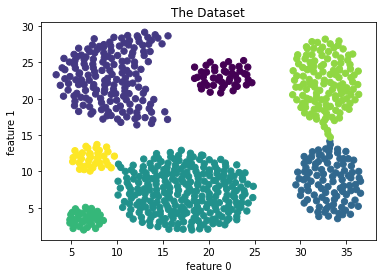

In [3]:
x = [trainset[i][0] for i in range(len(trainset))]
y = [trainset[i][1] for i in range(len(trainset))]
Cluster = [trainset[i][2] for i in range(len(trainset))]

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y, c=Cluster, s=40)
plt.title("The Dataset")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

plt.show()

## DBSCAN

In [4]:
MinPts = [1, 3, 5, 8, 10, 15, 20, 30, 50, 100]
epsilon = [0.1, 0.5, 0.7, 1, 2, 3, 4, 5, 6, 10]
X = [[trainset[i][0], trainset[i][1]] for i in range(len(trainset))]
labels_pred = []

for minpts in MinPts:
    for e in epsilon:
        clustering = DBSCAN(eps=e, min_samples=minpts).fit(X)
        labels_pred.append(clustering.labels_)

In [5]:
# calculate v-measure for 100 models
labels_true = [trainset[i][2] for i in range(len(trainset))]
v_values = []

for pred in labels_pred:
    v_values.append(v_measure_score(labels_true, pred))

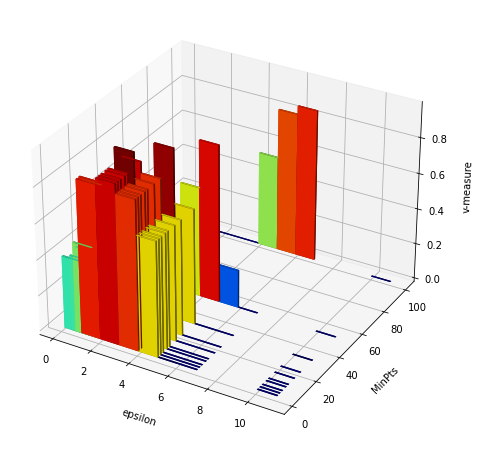

In [6]:
# preparation for 3D plot
MinPts = [1, 3, 5, 8, 10, 15, 20, 30, 50, 100]
MinPts = [[p]*10 for p in MinPts]
MinPts = np.reshape(MinPts, (100,))

epsilon = [0.1, 0.5, 0.7, 1, 2, 3, 4, 5, 6, 10]
epsilon = np.reshape(epsilon*10, (100,))


## 3D plot
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

z = v_values
cmap = cm.get_cmap('jet') # Get desired colormap
max_acc = np.max(z)   # get range of colorbars so we can normalize
min_acc = np.min(z)
# scale to [0,1], and get their rgb values
rgba = [cmap((k-min_acc)/max_acc) for k in z] 

ax.bar3d(epsilon, MinPts, np.zeros_like(z), 1, 1, z, color=rgba)

# Set axes label
ax.set_xlabel('epsilon', labelpad=10)
ax.set_ylabel('MinPts', labelpad=10)
ax.set_zlabel('v-measure', labelpad=10)

plt.show()

## Plot clusters after using DBSCAN for 5 best values of e, pts

In [31]:
# finding 5 best values of epsilon and minpts

l = copy.deepcopy(v_values)
l.sort()
top5_v_values = l[-5:]
print('Top 5 v_measure values:', top5_v_values)

indexes = []
top5_epsilon = []
top5_minpts = []

for v in top5_v_values:
    values = np.array(v_values)
    index = np.where(values == v)[0]  # find all occurances of the value in list
    if len(index) == 1:
        indexes.append(index[0])
        top5_epsilon.append(epsilon[index[0]])
        top5_minpts.append(MinPts[index[0]])
    else:
        for idx in index:
            if idx not in indexes:
                indexes.append(idx)
                top5_epsilon.append(epsilon[idx])
                top5_minpts.append(MinPts[idx])
                break
                
print('Top 5 indexes:', indexes)
print('Top 5 epsilon values:', top5_epsilon)
print('Top 5 min point values:', top5_minpts)

Top 5 v_measure values: [0.8894055132776749, 0.8894055132776749, 0.8976172231000894, 0.9434587021003981, 0.9767617757907475]
Top 5 indexes: [4, 14, 64, 75, 54]
Top 5 epsilon values: [2.0, 2.0, 2.0, 3.0, 2.0]
Top 5 min point values: [1, 3, 20, 30, 15]


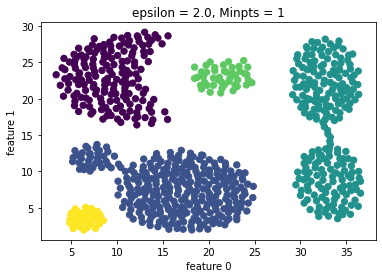

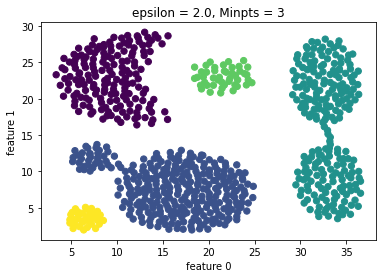

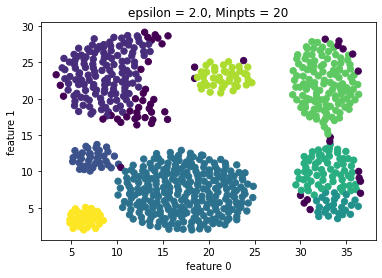

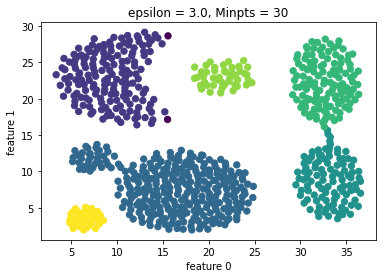

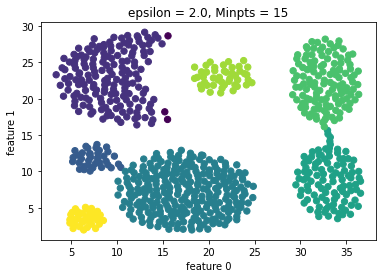

In [33]:
for idx in indexes:
    
    x = [trainset[i][0] for i in range(len(trainset))]
    y = [trainset[i][1] for i in range(len(trainset))]
    Cluster = labels_pred[idx]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    scatter = ax.scatter(x, y, c=Cluster, s=40)
    plt.title("epsilon = " + str(epsilon[idx]) + ', Minpts = ' + str(MinPts[idx]))
    plt.xlabel("feature 0")
    plt.ylabel("feature 1")

    plt.show()
        